### Závěrečný projet - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
- Druhou část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
3. Datová analýza - analýza dat
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [8]:
from bs4 import BeautifulSoup
import requests

strana = 1
seznam_bytu = [] 

while True:
    mesto = 'zlin'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    """
    ------------------------
    Zde pište svůj kód 
    ------------------------
    """
    # Najdeme si všechny inzerce
    
    
    list_inzeratu = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
    list_inzeratu_filtered = [
    item for item in list_inzeratu
    if not (
        "tip" in item.get("id", "").lower()  # Odstraníme položky s "tip" v ID
        or "adresar" in item.find("a", href=True)["href"]  # Odstraníme makléřské reklamy
        or "TIP:" in item.get_text()  # Odstraníme text obsahující "TIP:"
    )
]

    
    for byt in list_inzeratu_filtered:
            odkaz_tag = byt.find('a', href=True)
            odkaz = 'https://www.sreality.cz' + odkaz_tag['href'] if odkaz_tag else None  # odkaz na byt
            
            cena_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e')  # cena bytu 
            cena = cena_tag.get_text(strip=True) if cena_tag else "Neuvedeno"
            
            rozmer_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
            if rozmer_tag:
               text = rozmer_tag.get_text(strip=True)
               rozmery = " ".join(text.split()[3:])  # Odstraní první dvě slova
            else:
                rozmery = "Neuvedeno"
                
            dispozice = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
            if rozmer_tag:
               text = dispozice.get_text(strip=True)
               dispozice = " ".join(text.split()[2:3])  # Odstraní první dvě slova
            else:
                dispozice = "Neuvedeno"
                
            lokace_tag = byt.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')  # Musíš ověřit třídu
            lokace = lokace_tag[1].text.strip() if lokace_tag else None
            seznam_bytu.append(
            {
                'url': odkaz,
                'cena': cena,
                'rozmer': rozmery,
                'dispozice': dispozice,
                'lokace': lokace
            }
        )
        


    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text

    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

Scrapuju stránku č. 2
Scrapuju stránku č. 3
Scrapuju stránku č. 4
Scrapuju stránku č. 5
Scrapuju stránku č. 6
Scrapuju stránku č. 7
Scrapuju stránku č. 8
Již zde není žádná další strana. Končím


In [9]:
seznam_bytu

[{'url': 'https://www.sreality.cz/detail/pronajem/byt/1+kk/zlin-malenovice-tecovska/1112744524',
  'cena': '8\xa0300\xa0Kč/měsíc',
  'rozmer': '26 m²',
  'dispozice': '1+kk',
  'lokace': 'Tečovská, Zlín - Malenovice'},
 {'url': 'https://www.sreality.cz/detail/pronajem/byt/1+kk/zlin-zlin-j-a-bati/1042633804',
  'cena': 'Cena na vyžádání',
  'rozmer': '31 m²',
  'dispozice': '1+kk',
  'lokace': 'J. A. Bati, Zlín'},
 {'url': 'https://www.sreality.cz/detail/pronajem/byt/2+kk/zlin-zlin-lorencova/1472258636',
  'cena': '18\xa0700\xa0Kč/měsíc',
  'rozmer': '65 m²',
  'dispozice': '2+kk',
  'lokace': 'Lorencova, Zlín'},
 {'url': 'https://www.sreality.cz/detail/pronajem/byt/2+1/zlin-zlin-dlouha/1913504332',
  'cena': '12\xa0000\xa0Kč/měsíc',
  'rozmer': '56 m²',
  'dispozice': '2+1',
  'lokace': 'Dlouhá, Zlín'},
 {'url': 'https://www.sreality.cz/detail/pronajem/byt/1+1/zlin-zlin-vysoka/2008138316',
  'cena': '9\xa0000\xa0Kč/měsíc',
  'rozmer': '25 m²',
  'dispozice': '1+1',
  'lokace': 'Vysoká,

In [2]:
import pandas as pd

df = pd.DataFrame(seznam_bytu)




NameError: name 'seznam_bytu' is not defined

In [12]:
df.to_csv('byty_zlin.csv')

In [77]:
# data mimo while cyklus, abych mohla spouštět kód  samostatně 
list_inzeratu = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
list_inzeratu_filtered = [
    item for item in list_inzeratu
    if not (
        "tip" in item.get("id", "").lower()  # Odstraníme položky s "tip" v ID
        or "adresar" in item.find("a", href=True)["href"]  # Odstraníme makléřské reklamy
        or "TIP:" in item.get_text()  # Odstraníme text obsahující "TIP:"
    )
]

seznam_bytu = [] 
for byt in list_inzeratu_filtered:
        odkaz_tag = byt.find('a', href=True)
        odkaz = 'https://www.sreality.cz' + odkaz_tag['href'] if odkaz_tag else None  # odkaz na byt
        
        cena_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e')  # cena bytu 
        cena = cena_tag.get_text(strip=True) if cena_tag else "Neuvedeno"
        
        rozmer_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
        if rozmer_tag:
           text = rozmer_tag.get_text(strip=True)
           rozmery = " ".join(text.split()[3:])  # Odstraní první dvě slova
        else:
            rozmery = "Neuvedeno"
            
        dispozice = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
        if rozmer_tag:
           text = dispozice.get_text(strip=True)
           dispozice = " ".join(text.split()[2:3])  # Odstraní první dvě slova
        else:
            dispozice = "Neuvedeno"
            
        lokace_tag = byt.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')  # Musíš ověřit třídu
        lokace = lokace_tag[1].text.strip() if lokace_tag else None
        seznam_bytu.append(
        {
            'url': odkaz,
            'cena': cena,
            'rozmer': rozmery,
            'dispozice': dispozice,
            'lokace': lokace
        }
    )
        print(seznam_bytu) 
        
        
        
        
        
        
        
        
      


[{'url': 'https://www.sreality.cz/detail/pronajem/byt/2+kk/zlin-zlin-tyrsovo-nabrezi/2091799884', 'cena': '18\xa0000\xa0Kč/měsíc', 'rozmer': '49 m²', 'dispozice': '2+kk', 'lokace': 'Tyršovo nábřeží, Zlín'}]
[{'url': 'https://www.sreality.cz/detail/pronajem/byt/2+kk/zlin-zlin-tyrsovo-nabrezi/2091799884', 'cena': '18\xa0000\xa0Kč/měsíc', 'rozmer': '49 m²', 'dispozice': '2+kk', 'lokace': 'Tyršovo nábřeží, Zlín'}, {'url': 'https://www.sreality.cz/detail/pronajem/byt/4+1/zlin-zlin-na-honech-ii/3934757452', 'cena': '19\xa0000\xa0Kč/měsíc', 'rozmer': '79 m²', 'dispozice': '4+1', 'lokace': 'Na Honech II, Zlín'}]
[{'url': 'https://www.sreality.cz/detail/pronajem/byt/2+kk/zlin-zlin-tyrsovo-nabrezi/2091799884', 'cena': '18\xa0000\xa0Kč/měsíc', 'rozmer': '49 m²', 'dispozice': '2+kk', 'lokace': 'Tyršovo nábřeží, Zlín'}, {'url': 'https://www.sreality.cz/detail/pronajem/byt/4+1/zlin-zlin-na-honech-ii/3934757452', 'cena': '19\xa0000\xa0Kč/měsíc', 'rozmer': '79 m²', 'dispozice': '4+1', 'lokace': 'Na Ho

### Datová analýza

In [4]:
import pandas as pd

df = pd.read_csv('byty_zlin.csv')

In [14]:
df.head()

,Unnamed: 0,url,cena,rozmer,dispozice,lokace
0,0,https://www.sreality.cz/detail/pronajem/byt/1+...,8 300 Kč/měsíc,26 m²,1+kk,"Tečovská, Zlín - Malenovice"
1,1,https://www.sreality.cz/detail/pronajem/byt/1+...,Cena na vyžádání,31 m²,1+kk,"J. A. Bati, Zlín"
2,2,https://www.sreality.cz/detail/pronajem/byt/2+...,18 700 Kč/měsíc,65 m²,2+kk,"Lorencova, Zlín"
3,3,https://www.sreality.cz/detail/pronajem/byt/2+...,12 000 Kč/měsíc,56 m²,2+1,"Dlouhá, Zlín"
4,4,https://www.sreality.cz/detail/pronajem/byt/1+...,9 000 Kč/měsíc,25 m²,1+1,"Vysoká, Zlín"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  145 non-null    int64  
 1   url         145 non-null    object 
 2   cena        141 non-null    float64
 3   rozmer      145 non-null    object 
 4   dispozice   145 non-null    object 
 5   lokace      145 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.9+ KB


In [11]:
#chci přetypovat cenu nejdřív ji musím očistit 
# Čištění ceny - odstranění měny, pevné mezery a textu "měsíc"
df['cena'] = df['cena'].str.replace('Kč/měsíc', '').str.replace(' ','').str.replace(r'\xa0', ' ', regex=True).str.replace(r'\s+', '', regex=True)
df['cena'] = pd.to_numeric(df['cena'], errors='coerce')
df['cena']   # cena se z měnila na float64



0       8300.0
1          NaN
2      18700.0
3      12000.0
4       9000.0
        ...   
140    18000.0
141    19000.0
142    39900.0
143     9000.0
144    14900.0
Name: cena, Length: 145, dtype: float64

In [59]:
df.info()  # cena se z měnila na float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  145 non-null    int64 
 1   url         145 non-null    object
 2   cena        145 non-null    int32 
 3   rozmer      145 non-null    object
 4   dispozice   145 non-null    object
 5   lokace      145 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 6.4+ KB


In [12]:
df['cena'] = df['cena'].fillna(0)   # Nulové hodnoty budou 0

In [13]:
df['cena'] = df['cena'].astype(int)  # přetypovávám cenu z float na integer
df['cena'] 

0       8300
1          0
2      18700
3      12000
4       9000
       ...  
140    18000
141    19000
142    39900
143     9000
144    14900
Name: cena, Length: 145, dtype: int32

###  1 průměrná cena bytů 

In [14]:

prumerna_cena_bytu = df['cena'].mean() 
print(f'Průměrná cena bytů je {prumerna_cena_bytu} Kč.')

Průměrná cena bytů je 13591.641379310346 Kč.


### 2 průměrná cena bytů pro každou dispozici 1+1, 2+1 atp a  zobrazte na grafu 

In [22]:


df['dispozice'] = df['dispozice'].str.strip()  # Odstraním mezery na začátku a na konci
print(df['dispozice'].unique())    # Zjistím, jaké hodnoty obsahuje sloupec dispozice
df_prumerne_ceny = df.groupby('dispozice')['cena'].mean().reset_index()
df_prumerne_ceny['cena'] = df_prumerne_ceny['cena'].round(2)
df_prumerne_ceny


['1+kk' '2+kk' '2+1' '1+1' '3+1' '3+kk' 'atypický' 'pokoje' '4+1' '4+kk']


,dispozice,cena
0,1+1,10228.57
1,1+kk,9788.89
2,2+1,13335.19
3,2+kk,16107.18
4,3+1,16290.62
5,3+kk,19125.00
6,4+1,20000.00
7,4+kk,39900.00
8,atypický,9750.00
9,pokoje,6889.78


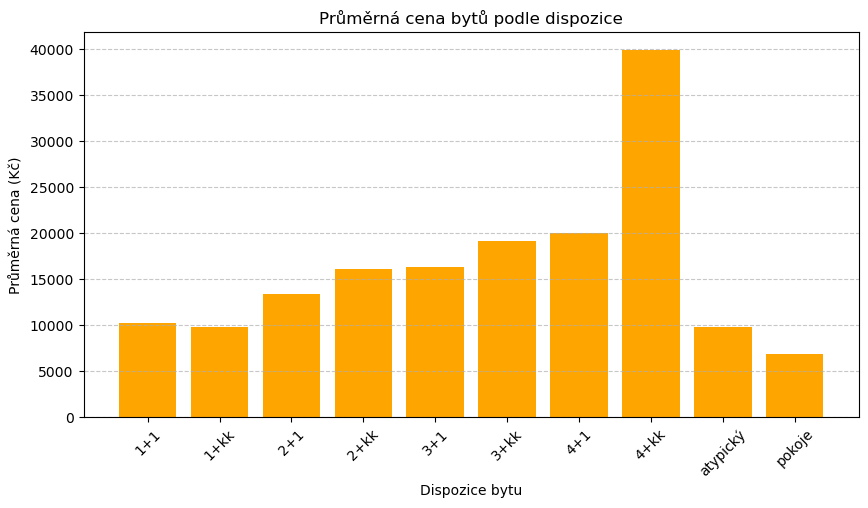

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_prumerne_ceny['dispozice'], df_prumerne_ceny['cena'], color='orange')

plt.xlabel('Dispozice bytu')
plt.ylabel('Průměrná cena (Kč)')
plt.title('Průměrná cena bytů podle dispozice')
plt.xticks(rotation=45)  # Otočení popisků na ose X pro lepší čitelnost
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 3 Jaká je průměrná velikost bytu pro každou kompozici?

In [24]:

print(df['rozmer'].unique())  # Zjistím, jaké hodnoty obsahuje sloupec rozměr


[ 26  31  65  56  25  21  68  96  41  34  48  58  36  64  55 115  57  37
  60  44  32  33  51  28  30  23  50  29  45  66  38  19 110  40  18  22
  20  95  62  35  83  76  77  49  17  70  59  85  67  27 100 120  75 114
 111  16  52  69  89  93  54  73  86  79  47]


In [ ]:
df['rozmer'] = df['rozmer'].str.replace('m²', '', regex=True).str.strip()  # Odstraníme "m²" a mezery

df['rozmer'] = pd.to_numeric(df['rozmer'], errors='coerce')  # Převedeme na číslo, chybné hodnoty jako NaN


In [45]:
df_prumerne_rozmery = df.groupby('dispozice')['rozmer'].mean().reset_index()
df_prumerne_rozmery['rozmer'] = df_prumerne_rozmery['rozmer'].round(2)  # Zaokrouhlíme na 2 desetinná místa
df_prumerne_rozmery.columns = ['dispozice', 'prumerne_rozmery']
df_prumerne_rozmery



,dispozice,prumerne_rozmery
0,1+1,35.07
1,1+kk,29.11
2,2+1,57.41
3,2+kk,59.51
4,3+1,78.94
5,3+kk,82.88
6,4+1,81.00
7,4+kk,100.00
8,atypický,27.00
9,pokoje,37.67


### 4 Existuje ulice, kde je vyšší koncentrace dražších bytů?

In [30]:

print(df['lokace'].unique())  # Zjistím unikátní hodnoty ve sloupci lokace


['Tečovská, Zlín - Malenovice' 'J. A. Bati, Zlín' 'Lorencova, Zlín'
 'Dlouhá, Zlín' 'Vysoká, Zlín' 'Zahradní, Zlín - Malenovice'
 'Tyršova, Zlín - Malenovice' 'Lešetín I, Zlín' 'Beckovská, Zlín'
 'Větrná, Zlín' 'Dukelská, Zlín' 'Václavská, Zlín - Kudlov'
 'Podlesí V, Zlín' 'Budovatelská, Zlín' 'Chelčického, Zlín - Malenovice'
 'Zlín' 'Pod Veselou, Slušovice' 'Komenského, Fryšták'
 'třída Svobody, Zlín - Malenovice' 'Zarámí, Zlín' 'Na Honech II, Zlín'
 'Smetanova, Zlín' 'Havlíčkova, Otrokovice' 'Česká, Zlín'
 'Družstevní, Slušovice' 'tř. Spojenců, Otrokovice' 'Sadová, Zlín'
 'Cihlářská, Zlín' 'Podlesí II, Zlín' 'třída Tomáše Bati, Zlín'
 'L. Váchy, Zlín' 'Pasecká, Zlín' 'Kúty, Zlín'
 'nám. 3. května, Otrokovice' 'Otrokovice - Kvítkovice'
 'L. Váchy, Zlín - Prštné' 'Masarykovo náměstí, Napajedla' 'Potoky, Zlín'
 'Nádražní, Otrokovice' 'Zadní luhy, Zlín - Louky'
 'Pančava, Zlín - Příluky' 'Vejvanovská, Zlín' 'Štefánikova, Zlín'
 'Slunečná, Zlín' 'Zabrání, Zlín - Malenovice' 'Zálešná II, Z

In [32]:
df['ulice'] = df['lokace'].str.split(',').str[0]  # Vezmeme jen část před čárkou (ulice)
df['ulice']

0             Tečovská
1           J. A. Bati
2            Lorencova
3               Dlouhá
4               Vysoká
            ...       
140    Tyršovo nábřeží
141       Na Honech II
142         Luhačovice
143           V Dolině
144            K Luhám
Name: ulice, Length: 145, dtype: object

In [63]:
df_prumerna_cena_ulice = df.groupby('ulice')['cena'].mean().reset_index()
df_prumerna_cena_ulice['cena'] = df_prumerna_cena_ulice['cena'].round(2)  # Zaokrouhlíme na 2 desetinná místa
df_prumerna_cena_ulice.columns = ['ulice', 'prumerna cena']
df_prumerna_cena_ulice.head(10)


,ulice,prumerna cena
0,Bartošova,20000.00
1,Beckovská,17000.00
2,Bezručova,12000.00
3,Budovatelská,15750.00
4,Chelčického,17450.00
5,Cihlářská,16500.00
6,Dlouhá,13333.33
7,Družstevní,9000.00
8,Dukelská,14000.00
9,Díly II,11900.00


In [70]:
#Seřadíme ulice od nejdražších po nejlevnější:
df_prumerna_cena_ulice = df_prumerna_cena_ulice.sort_values(by='prumerna cena', ascending=False)
top_10_ulic = df_prumerna_cena_ulice.head(10)
top_10_ulic

,ulice,prumerna cena
31,Na Honech I,25000.0
24,Lešetín I,20500.0
0,Bartošova,20000.0
66,Zabrání,20000.0
49,Přístav,20000.0
53,Slezská,19000.0
59,Tyršovo nábřeží,18000.0
44,Podlesí I,18000.0
69,Zarámí,17500.0
4,Chelčického,17450.0


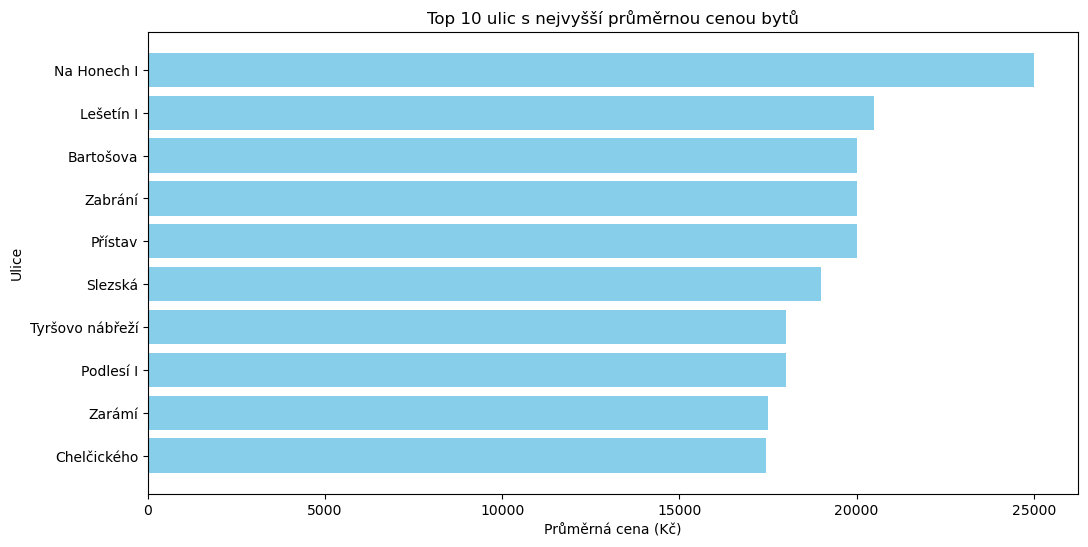

In [71]:
# Vytvoření grafu
plt.figure(figsize=(12, 6))
plt.barh(top_10_ulic['ulice'], top_10_ulic['prumerna cena'], color='skyblue')
plt.xlabel('Průměrná cena (Kč)')
plt.ylabel('Ulice')
plt.title('Top 10 ulic s nejvyšší průměrnou cenou bytů')
plt.gca().invert_yaxis()  # Otočení osy y pro lepší čitelnost
plt.show()

### 5 Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

In [42]:
# Spočítám počet výskytů jednotlivých dispozic
df_dispozice_counts = df['dispozice'].value_counts().reset_index()
df_dispozice_counts
# Přejmenujeme sloupce pro lepší čitelnost
df_dispozice_counts.columns = ['dispozice', 'pocet_inzeratu']
df_dispozice_counts


,dispozice,pocet_inzeratu
0,2+kk,39
1,1+kk,27
2,2+1,27
3,3+1,16
4,1+1,14
5,pokoje,9
6,3+kk,8
7,atypický,2
8,4+1,2
9,4+kk,1


Z výsledků víme, že 2+kk je nejčastější dispozicí v inzerátech. Proč? Můžeme se zamyslet nad důvody. Několik možností:

1. Populární mezi nájemníky a kupujícími

2+kk je často preferovaná velikost pro mladé páry, jednotlivce a investory (např. na pronájem).
Menší byty mají nižší celkovou cenu než větší jednotky, takže jsou dostupnější.

2. Ekonomické faktory

Výstavba 2+kk je nákladově efektivnější pro developery než větší byty.
Menší byty jsou rychleji prodejné než velké dispozice, což znamená vyšší poptávku.

3. Nabídka a poptávka v lokalitě

Pokud ve Zlíně převažují mladí lidé nebo menší domácnosti, mohlo by to vysvětlovat vysoký počet inzerátů na 2+kk.

Jak to můžeme potvrdit daty?
Můžeme se podívat na několik věcí:

1. Průměrná cena za m² pro různé dispozice – jsou 2+kk levnější na m²?
2. Průměrná velikost bytu u různých dispozic – jak velké jsou ve srovnání s ostatními?
3. Lokalita – kde se 2+kk vyskytují nejčastěji?
Možná se soustředí do určitých částí města, např. do novostaveb nebo oblastí s vysokou poptávkou.

### 6 Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?


In [46]:
df_drahe_byty = df[df['cena'] > 20000]  # Filtrování bytů nad 20 000 Kč
df_drahe_male_byty = df_drahe_byty[df_drahe_byty['dispozice'].isin(['2+1', '2+kk'])]  # Jen malé byty
df_drahe_male_byty


,Unnamed: 0,url,cena,rozmer,dispozice,lokace,ulice
7,7,https://www.sreality.cz/detail/pronajem/byt/2+...,25000,96,2+kk,"Lešetín I, Zlín",Lešetín I
19,19,https://www.sreality.cz/detail/pronajem/byt/2+...,20690,64,2+kk,"třída Svobody, Zlín - Malenovice",třída Svobody
113,113,https://www.sreality.cz/detail/pronajem/byt/2+...,25000,111,2+kk,"Smetanova, Zlín",Smetanova
127,127,https://www.sreality.cz/detail/pronajem/byt/2+...,22000,85,2+kk,Luhačovice,Luhačovice
135,135,https://www.sreality.cz/detail/pronajem/byt/2+...,23000,120,2+kk,"Nádražní, Luhačovice",Nádražní


### 7 Zjištěte minimální a maximální inzerce pro každou kompozici(dispozici) bytu. Která kompozice(dispozice) má největší rozptyl mezi minimální a maximální inzerovanou cenou

In [48]:
df_ceny_rozptyl = df.groupby('dispozice')['cena'].agg(['min', 'max'])
df_ceny_rozptyl['rozptyl'] = df_ceny_rozptyl['max'] - df_ceny_rozptyl['min']
df_ceny_rozptyl

,min,max,rozptyl
dispozice,,,
1+1,4200,13500,9300
1+kk,0,14900,14900
2+1,9000,16500,7500
2+kk,0,25000,25000
3+1,11900,19000,7100
3+kk,13000,29000,16000
4+1,19000,21000,2000
4+kk,39900,39900,0
atypický,7500,12000,4500


In [50]:
# Najdeme dispozici s největším rozptylem  Použiju .idxmax() na sloupec rozptyl:
nejvetsi_rozptyl_dispozice = df_ceny_rozptyl['rozptyl'].idxmax()
nejvetsi_rozptyl_hodnota = df_ceny_rozptyl['rozptyl'].max()

In [51]:
print(f"Největší rozptyl cen má dispozice {nejvetsi_rozptyl_dispozice} s rozptylem {nejvetsi_rozptyl_hodnota} Kč.")

Největší rozptyl cen má dispozice 2+kk s rozptylem 25000 Kč.


In [59]:
#Seskupení dat pro případný export z excelu
df_grouped_ceny = df.groupby('dispozice')['cena'].agg(['min', 'max', 'mean']).reset_index()
df_grouped_ceny

,dispozice,min,max,mean
0,1+1,4200,13500,10228.571429
1,1+kk,0,14900,9788.888889
2,2+1,9000,16500,13335.185185
3,2+kk,0,25000,16107.179487
4,3+1,11900,19000,16290.625000
5,3+kk,13000,29000,19125.000000
6,4+1,19000,21000,20000.000000
7,4+kk,39900,39900,39900.000000
8,atypický,7500,12000,9750.000000
9,pokoje,3708,10500,6889.777778


In [55]:
df_grouped_velikost = df.groupby('dispozice')['rozmer'].mean().reset_index()
df_grouped_velikost

,dispozice,rozmer
0,1+1,35.071429
1,1+kk,29.111111
2,2+1,57.407407
3,2+kk,59.512821
4,3+1,78.937500
5,3+kk,82.875000
6,4+1,81.000000
7,4+kk,100.000000
8,atypický,27.000000
9,pokoje,37.666667


In [56]:
df_pocty_dispozic = df['dispozice'].value_counts().reset_index()
df_pocty_dispozic.columns = ['dispozice', 'pocet']

In [ ]:
with pd.ExcelWriter("byty_zlin_vysledky.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Původní data", index=False)
    df_grouped_ceny.to_excel(writer, sheet_name="Ceny podle dispozice", index=False)
    df_grouped_velikost.to_excel(writer, sheet_name="Velikost podle dispozice", index=False)
    df_pocty_dispozic.to_excel(writer, sheet_name="Počet inzerátů", index=False)

print("Všechna seskupená data byla uložena do 'byty_zlin_vysledky.xlsx'")